# Pnemonia_Predection

#importing all libray

In [1]:
import os
from pathlib import Path

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import cv2

In [3]:
from tensorflow.keras.layers import Input,Lambda,Dense,Flatten,Conv2D,MaxPooling2D,Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from glob import glob
from PIL import Image
import warnings
warnings.filterwarnings("ignore")

In [4]:
#check gpu is th
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [5]:
if tf.test.gpu_device_name(): 
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

Default GPU Device: /device:GPU:0


In [6]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [7]:
from tensorflow.python.client import device_lib

def get_available_devices():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos]

print(get_available_devices())

['/device:CPU:0', '/device:GPU:0']


In [8]:
tf.test.is_built_with_cuda()

True

In [ ]:
##Path and dir 

In [10]:
print(os.listdir("../PNEUMONIA_Data/chest_xray/"))

['test', 'train', 'val']


In [11]:
train_set ='../PNEUMONIA_Data/chest_xray/train/*'
test_set = '../PNEUMONIA_Data/chest_xray/test/*'
valid_set='../PNEUMONIA_Data/chest_xray/val/*'

In [12]:
for dirname, _, filenames in os.walk('../PNEUMONIA_Data/chest_xray'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

../PNEUMONIA_Data/chest_xray\test\NORMAL\IM-0001-0001.jpeg
../PNEUMONIA_Data/chest_xray\test\NORMAL\IM-0003-0001.jpeg
../PNEUMONIA_Data/chest_xray\test\NORMAL\IM-0005-0001.jpeg
../PNEUMONIA_Data/chest_xray\test\NORMAL\IM-0006-0001.jpeg
../PNEUMONIA_Data/chest_xray\test\NORMAL\IM-0007-0001.jpeg
../PNEUMONIA_Data/chest_xray\test\NORMAL\IM-0009-0001.jpeg
../PNEUMONIA_Data/chest_xray\test\NORMAL\IM-0010-0001.jpeg
../PNEUMONIA_Data/chest_xray\test\NORMAL\IM-0011-0001-0001.jpeg
../PNEUMONIA_Data/chest_xray\test\NORMAL\IM-0011-0001-0002.jpeg
../PNEUMONIA_Data/chest_xray\test\NORMAL\IM-0011-0001.jpeg
../PNEUMONIA_Data/chest_xray\test\NORMAL\IM-0013-0001.jpeg
../PNEUMONIA_Data/chest_xray\test\NORMAL\IM-0015-0001.jpeg
../PNEUMONIA_Data/chest_xray\test\NORMAL\IM-0016-0001.jpeg
../PNEUMONIA_Data/chest_xray\test\NORMAL\IM-0017-0001.jpeg
../PNEUMONIA_Data/chest_xray\test\NORMAL\IM-0019-0001.jpeg
../PNEUMONIA_Data/chest_xray\test\NORMAL\IM-0021-0001.jpeg
../PNEUMONIA_Data/chest_xray\test\NORMAL\IM-00

../PNEUMONIA_Data/chest_xray\train\NORMAL\NORMAL2-IM-0832-0001-0002.jpeg
../PNEUMONIA_Data/chest_xray\train\NORMAL\NORMAL2-IM-0832-0001.jpeg
../PNEUMONIA_Data/chest_xray\train\NORMAL\NORMAL2-IM-0833-0001.jpeg
../PNEUMONIA_Data/chest_xray\train\NORMAL\NORMAL2-IM-0834-0001.jpeg
../PNEUMONIA_Data/chest_xray\train\NORMAL\NORMAL2-IM-0836-0001.jpeg
../PNEUMONIA_Data/chest_xray\train\NORMAL\NORMAL2-IM-0837-0001.jpeg
../PNEUMONIA_Data/chest_xray\train\NORMAL\NORMAL2-IM-0838-0001.jpeg
../PNEUMONIA_Data/chest_xray\train\NORMAL\NORMAL2-IM-0839-0001.jpeg
../PNEUMONIA_Data/chest_xray\train\NORMAL\NORMAL2-IM-0840-0001.jpeg
../PNEUMONIA_Data/chest_xray\train\NORMAL\NORMAL2-IM-0841-0001.jpeg
../PNEUMONIA_Data/chest_xray\train\NORMAL\NORMAL2-IM-0842-0001.jpeg
../PNEUMONIA_Data/chest_xray\train\NORMAL\NORMAL2-IM-0843-0001.jpeg
../PNEUMONIA_Data/chest_xray\train\NORMAL\NORMAL2-IM-0845-0001.jpeg
../PNEUMONIA_Data/chest_xray\train\NORMAL\NORMAL2-IM-0846-0001.jpeg
../PNEUMONIA_Data/chest_xray\train\NORMAL\N

../PNEUMONIA_Data/chest_xray\train\NORMAL\NORMAL2-IM-1303-0001.jpeg
../PNEUMONIA_Data/chest_xray\train\NORMAL\NORMAL2-IM-1304-0001.jpeg
../PNEUMONIA_Data/chest_xray\train\NORMAL\NORMAL2-IM-1305-0001.jpeg
../PNEUMONIA_Data/chest_xray\train\NORMAL\NORMAL2-IM-1306-0001.jpeg
../PNEUMONIA_Data/chest_xray\train\NORMAL\NORMAL2-IM-1307-0001.jpeg
../PNEUMONIA_Data/chest_xray\train\NORMAL\NORMAL2-IM-1308-0001.jpeg
../PNEUMONIA_Data/chest_xray\train\NORMAL\NORMAL2-IM-1310-0001.jpeg
../PNEUMONIA_Data/chest_xray\train\NORMAL\NORMAL2-IM-1311-0001.jpeg
../PNEUMONIA_Data/chest_xray\train\NORMAL\NORMAL2-IM-1314-0001.jpeg
../PNEUMONIA_Data/chest_xray\train\NORMAL\NORMAL2-IM-1315-0001.jpeg
../PNEUMONIA_Data/chest_xray\train\NORMAL\NORMAL2-IM-1316-0001.jpeg
../PNEUMONIA_Data/chest_xray\train\NORMAL\NORMAL2-IM-1317-0001.jpeg
../PNEUMONIA_Data/chest_xray\train\NORMAL\NORMAL2-IM-1318-0001.jpeg
../PNEUMONIA_Data/chest_xray\train\NORMAL\NORMAL2-IM-1319-0001.jpeg
../PNEUMONIA_Data/chest_xray\train\NORMAL\NORMAL

../PNEUMONIA_Data/chest_xray\train\PNEUMONIA\person1241_bacteria_3197.jpeg
../PNEUMONIA_Data/chest_xray\train\PNEUMONIA\person1241_virus_2106.jpeg
../PNEUMONIA_Data/chest_xray\train\PNEUMONIA\person1242_bacteria_3198.jpeg
../PNEUMONIA_Data/chest_xray\train\PNEUMONIA\person1242_virus_2108.jpeg
../PNEUMONIA_Data/chest_xray\train\PNEUMONIA\person1242_virus_2109.jpeg
../PNEUMONIA_Data/chest_xray\train\PNEUMONIA\person1243_bacteria_3199.jpeg
../PNEUMONIA_Data/chest_xray\train\PNEUMONIA\person1243_virus_2110.jpeg
../PNEUMONIA_Data/chest_xray\train\PNEUMONIA\person1244_bacteria_3200.jpeg
../PNEUMONIA_Data/chest_xray\train\PNEUMONIA\person1244_virus_2111.jpeg
../PNEUMONIA_Data/chest_xray\train\PNEUMONIA\person1246_bacteria_3202.jpeg
../PNEUMONIA_Data/chest_xray\train\PNEUMONIA\person1247_bacteria_3203.jpeg
../PNEUMONIA_Data/chest_xray\train\PNEUMONIA\person1247_virus_2115.jpeg
../PNEUMONIA_Data/chest_xray\train\PNEUMONIA\person1248_bacteria_3204.jpeg
../PNEUMONIA_Data/chest_xray\train\PNEUMONI

../PNEUMONIA_Data/chest_xray\train\PNEUMONIA\person1447_bacteria_3741.jpeg
../PNEUMONIA_Data/chest_xray\train\PNEUMONIA\person1448_virus_2468.jpeg
../PNEUMONIA_Data/chest_xray\train\PNEUMONIA\person1449_bacteria_3743.jpeg
../PNEUMONIA_Data/chest_xray\train\PNEUMONIA\person1449_bacteria_3745.jpeg
../PNEUMONIA_Data/chest_xray\train\PNEUMONIA\person1449_bacteria_3746.jpeg
../PNEUMONIA_Data/chest_xray\train\PNEUMONIA\person1449_bacteria_3747.jpeg
../PNEUMONIA_Data/chest_xray\train\PNEUMONIA\person1449_virus_2474.jpeg
../PNEUMONIA_Data/chest_xray\train\PNEUMONIA\person1449_virus_2476.jpeg
../PNEUMONIA_Data/chest_xray\train\PNEUMONIA\person1450_bacteria_3753.jpeg
../PNEUMONIA_Data/chest_xray\train\PNEUMONIA\person1451_virus_2479.jpeg
../PNEUMONIA_Data/chest_xray\train\PNEUMONIA\person1451_virus_2480.jpeg
../PNEUMONIA_Data/chest_xray\train\PNEUMONIA\person1451_virus_2482.jpeg
../PNEUMONIA_Data/chest_xray\train\PNEUMONIA\person1452_virus_2484.jpeg
../PNEUMONIA_Data/chest_xray\train\PNEUMONIA\p

../PNEUMONIA_Data/chest_xray\train\PNEUMONIA\person1690_bacteria_4475.jpeg
../PNEUMONIA_Data/chest_xray\train\PNEUMONIA\person1691_bacteria_4479.jpeg
../PNEUMONIA_Data/chest_xray\train\PNEUMONIA\person1691_bacteria_4481.jpeg
../PNEUMONIA_Data/chest_xray\train\PNEUMONIA\person1693_bacteria_4485.jpeg
../PNEUMONIA_Data/chest_xray\train\PNEUMONIA\person1695_bacteria_4492.jpeg
../PNEUMONIA_Data/chest_xray\train\PNEUMONIA\person1696_bacteria_4495.jpeg
../PNEUMONIA_Data/chest_xray\train\PNEUMONIA\person1697_bacteria_4496.jpeg
../PNEUMONIA_Data/chest_xray\train\PNEUMONIA\person1698_bacteria_4497.jpeg
../PNEUMONIA_Data/chest_xray\train\PNEUMONIA\person1699_bacteria_4498.jpeg
../PNEUMONIA_Data/chest_xray\train\PNEUMONIA\person16_bacteria_53.jpeg
../PNEUMONIA_Data/chest_xray\train\PNEUMONIA\person16_bacteria_54.jpeg
../PNEUMONIA_Data/chest_xray\train\PNEUMONIA\person16_bacteria_55.jpeg
../PNEUMONIA_Data/chest_xray\train\PNEUMONIA\person1700_bacteria_4500.jpeg
../PNEUMONIA_Data/chest_xray\train\PN

../PNEUMONIA_Data/chest_xray\train\PNEUMONIA\person554_bacteria_2322.jpeg
../PNEUMONIA_Data/chest_xray\train\PNEUMONIA\person554_bacteria_2323.jpeg
../PNEUMONIA_Data/chest_xray\train\PNEUMONIA\person554_virus_1094.jpeg
../PNEUMONIA_Data/chest_xray\train\PNEUMONIA\person555_bacteria_2325.jpeg
../PNEUMONIA_Data/chest_xray\train\PNEUMONIA\person556_bacteria_2326.jpeg
../PNEUMONIA_Data/chest_xray\train\PNEUMONIA\person556_virus_1096.jpeg
../PNEUMONIA_Data/chest_xray\train\PNEUMONIA\person557_bacteria_2327.jpeg
../PNEUMONIA_Data/chest_xray\train\PNEUMONIA\person557_virus_1097.jpeg
../PNEUMONIA_Data/chest_xray\train\PNEUMONIA\person558_bacteria_2328.jpeg
../PNEUMONIA_Data/chest_xray\train\PNEUMONIA\person558_virus_1098.jpeg
../PNEUMONIA_Data/chest_xray\train\PNEUMONIA\person559_bacteria_2329.jpeg
../PNEUMONIA_Data/chest_xray\train\PNEUMONIA\person559_virus_1099.jpeg
../PNEUMONIA_Data/chest_xray\train\PNEUMONIA\person55_bacteria_260.jpeg
../PNEUMONIA_Data/chest_xray\train\PNEUMONIA\person55_b

../PNEUMONIA_Data/chest_xray\train\PNEUMONIA\person747_virus_1370.jpeg
../PNEUMONIA_Data/chest_xray\train\PNEUMONIA\person747_virus_1372.jpeg
../PNEUMONIA_Data/chest_xray\train\PNEUMONIA\person748_virus_1373.jpeg
../PNEUMONIA_Data/chest_xray\train\PNEUMONIA\person749_bacteria_2652.jpeg
../PNEUMONIA_Data/chest_xray\train\PNEUMONIA\person749_virus_1374.jpeg
../PNEUMONIA_Data/chest_xray\train\PNEUMONIA\person74_bacteria_361.jpeg
../PNEUMONIA_Data/chest_xray\train\PNEUMONIA\person74_bacteria_362.jpeg
../PNEUMONIA_Data/chest_xray\train\PNEUMONIA\person74_bacteria_363.jpeg
../PNEUMONIA_Data/chest_xray\train\PNEUMONIA\person750_bacteria_2653.jpeg
../PNEUMONIA_Data/chest_xray\train\PNEUMONIA\person751_bacteria_2654.jpeg
../PNEUMONIA_Data/chest_xray\train\PNEUMONIA\person752_virus_1377.jpeg
../PNEUMONIA_Data/chest_xray\train\PNEUMONIA\person753_bacteria_2656.jpeg
../PNEUMONIA_Data/chest_xray\train\PNEUMONIA\person753_virus_1378.jpeg
../PNEUMONIA_Data/chest_xray\train\PNEUMONIA\person754_virus_1

In [13]:
def data_prep(normalized,pneumonia):
    normalized= ["../PNEUMONIA_Data/chest_xray/train/NORMAL" + '/' +normal for normal in normalized]
    pneumonia =["../PNEUMONIA_Data/chest_xray/train/PNEUMONIA"+'/'+pnemon for pnemon in pneumonia]
    
    labels = len(normalized)*['normal'] + len(pneumonia)*['pneumonia']
    data = normalized + pneumonia

    return pd.DataFrame({'Image_Path': data , 'Labels': labels})

In [14]:
df = data_prep(os.listdir('../PNEUMONIA_Data/chest_xray/train/NORMAL/'), os.listdir('../PNEUMONIA_Data/chest_xray/train/PNEUMONIA/'))
df.head()

,Image_Path,Labels
0,../PNEUMONIA_Data/chest_xray/train/NORMAL/IM-0...,normal
1,../PNEUMONIA_Data/chest_xray/train/NORMAL/IM-0...,normal
2,../PNEUMONIA_Data/chest_xray/train/NORMAL/IM-0...,normal
3,../PNEUMONIA_Data/chest_xray/train/NORMAL/IM-0...,normal
4,../PNEUMONIA_Data/chest_xray/train/NORMAL/IM-0...,normal


In [15]:
df.tail()

,Image_Path,Labels
5211,../PNEUMONIA_Data/chest_xray/train/PNEUMONIA/p...,pneumonia
5212,../PNEUMONIA_Data/chest_xray/train/PNEUMONIA/p...,pneumonia
5213,../PNEUMONIA_Data/chest_xray/train/PNEUMONIA/p...,pneumonia
5214,../PNEUMONIA_Data/chest_xray/train/PNEUMONIA/p...,pneumonia
5215,../PNEUMONIA_Data/chest_xray/train/PNEUMONIA/p...,pneumonia


Displaying 5 Normal Images: 



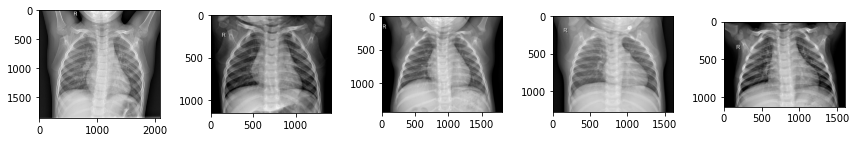


Displaying 5 pneumonia Images: 



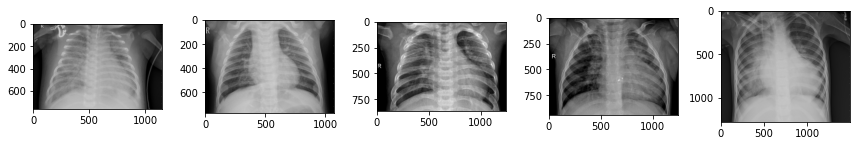

In [16]:
print("Displaying 5 Normal Images: ")
print()
plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread(df[df['Labels'] == 'normal']['Image_Path'][i])
    plt.imshow(img)
    plt.tight_layout()
plt.show()


print()
print("Displaying 5 pneumonia Images: ")
print()
plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread(df[df['Labels'] == 'pneumonia']['Image_Path'].reset_index(drop=True)[i])
    plt.imshow(img)
    plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Distribution of samples according to the categories')

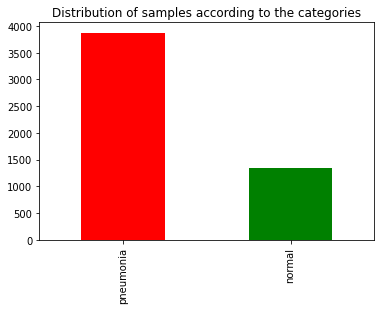

In [17]:
df['Labels'].value_counts().plot(kind = 'bar', color = ['red', 'green'])
plt.title('Distribution of samples according to the categories')

In [18]:
#Image Generator

traning_gen =ImageDataGenerator(rescale=1./255,
                               rotation_range=10,
                               width_shift_range=.1,
                               height_shift_range=.1,
                               shear_range=0.1,
                               zoom_range=0.1,
                               horizontal_flip=True,
                               fill_mode="nearest")

testing_gen =ImageDataGenerator(rescale=1./255)

In [19]:
##Added generated image to img directory...
train_generator =traning_gen.flow_from_directory("../PNEUMONIA_Data/chest_xray/train",target_size=(150,150),
                                                 batch_size=128,class_mode="binary")
test_generator =testing_gen.flow_from_directory("../PNEUMONIA_Data/chest_xray/test",target_size=(150,150),
                                               batch_size=128,class_mode="binary")

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [20]:
#CNN model 
model =Sequential([
    #first_layer --input size 150,150 ,3-RGB
    Conv2D(64,(3,3),activation='relu',input_shape=(150,150,3)),
    MaxPooling2D(2,2),
    #Second_layers
    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    #Third_layers
    Conv2D(256,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    #Forth_layers
    Conv2D(128,(4,4),activation='relu'),
    MaxPooling2D(3,3),
    #flatten the result feed into NN
    Flatten(),
    Dropout(.5),
    #hidden_layer_1
    Dense(256,activation='relu'),
    #hidden_layers_2
    Dense(512,activation='relu'),
    #output_layers
    Dense(1,activation='sigmoid')
])

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [21]:
#model_summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 256)       295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 256)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 128)       5

In [25]:
#using gpu for training
##for cpu change the device or remove the 1st_line_of_code
with tf.device('/GPU:0'):
    history =model.fit(train_generator,validation_data=test_generator,
                      epochs=25,
                      steps_per_epoch=25,
                      verbose=1,
                      validation_steps=5)

Epoch 1/10
25/25 [==============================] - 35s 1s/step - loss: 0.4654 - accuracy: 0.7910 - val_loss: 0.5285 - val_accuracy: 0.7372
Epoch 2/10
25/25 [==============================] - 34s 1s/step - loss: 0.4144 - accuracy: 0.8150 - val_loss: 0.6699 - val_accuracy: 0.7292
Epoch 3/10
25/25 [==============================] - 35s 1s/step - loss: 0.3586 - accuracy: 0.8500 - val_loss: 0.5288 - val_accuracy: 0.7981
Epoch 4/10
25/25 [==============================] - 35s 1s/step - loss: 0.2746 - accuracy: 0.8894 - val_loss: 0.4100 - val_accuracy: 0.8237
Epoch 5/10
25/25 [==============================] - 35s 1s/step - loss: 0.2291 - accuracy: 0.9053 - val_loss: 0.5261 - val_accuracy: 0.7901
Epoch 6/10
25/25 [==============================] - 35s 1s/step - loss: 0.2498 - accuracy: 0.8952 - val_loss: 0.5085 - val_accuracy: 0.7756
Epoch 7/10
25/25 [==============================] - 35s 1s/step - loss: 0.2135 - accuracy: 0.9125 - val_loss: 0.3859 - val_accuracy: 0.8446
Epoch 8/10
25/25 [==

In [26]:
#lets us test the some images
for dirname, _, filenames in os.walk('../PNEUMONIA_Data/chest_xray/val/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

../PNEUMONIA_Data/chest_xray/val/NORMAL\NORMAL2-IM-1427-0001.jpeg
../PNEUMONIA_Data/chest_xray/val/NORMAL\NORMAL2-IM-1430-0001.jpeg
../PNEUMONIA_Data/chest_xray/val/NORMAL\NORMAL2-IM-1431-0001.jpeg
../PNEUMONIA_Data/chest_xray/val/NORMAL\NORMAL2-IM-1436-0001.jpeg
../PNEUMONIA_Data/chest_xray/val/NORMAL\NORMAL2-IM-1437-0001.jpeg
../PNEUMONIA_Data/chest_xray/val/NORMAL\NORMAL2-IM-1438-0001.jpeg
../PNEUMONIA_Data/chest_xray/val/NORMAL\NORMAL2-IM-1440-0001.jpeg
../PNEUMONIA_Data/chest_xray/val/NORMAL\NORMAL2-IM-1442-0001.jpeg
../PNEUMONIA_Data/chest_xray/val/PNEUMONIA\person1946_bacteria_4874.jpeg
../PNEUMONIA_Data/chest_xray/val/PNEUMONIA\person1946_bacteria_4875.jpeg
../PNEUMONIA_Data/chest_xray/val/PNEUMONIA\person1947_bacteria_4876.jpeg
../PNEUMONIA_Data/chest_xray/val/PNEUMONIA\person1949_bacteria_4880.jpeg
../PNEUMONIA_Data/chest_xray/val/PNEUMONIA\person1950_bacteria_4881.jpeg
../PNEUMONIA_Data/chest_xray/val/PNEUMONIA\person1951_bacteria_4882.jpeg
../PNEUMONIA_Data/chest_xray/val/P

In [ ]:
#testing the model 

In [70]:
val_gen=ImageDataGenerator(rescale=1./255)

In [71]:
validation_data=val_gen.flow_from_directory("../PNEUMONIA_Data/chest_xray/val",target_size=(150,150),class_mode="binary")

Found 16 images belonging to 2 classes.


In [73]:
model_prediction = model.predict(validation_data)

In [74]:
prediction = tf.squeeze(tf.round(model_prediction))
prediction

<tf.Tensor: shape=(16,), dtype=float32, numpy=
array([1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1.],
      dtype=float32)>

In [75]:
sample_normal = tf.keras.preprocessing.image.load_img("../PNEUMONIA_Data/chest_xray/val/NORMAL/NORMAL2-IM-1431-0001.jpeg",target_size=(150,150,3))
sample_pneumonia= tf.keras.preprocessing.image.load_img("../PNEUMONIA_Data/chest_xray/val/PNEUMONIA/person1951_bacteria_4882.jpeg", target_size=(150,150,3))

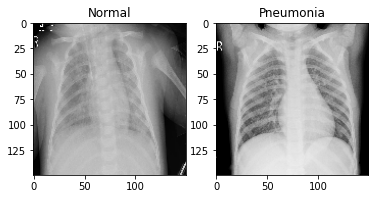

In [76]:
plt.subplot(1,2,1)
plt.imshow(sample_pneumonia)
plt.title("Normal")
plt.subplot(1,2,2)
plt.imshow(sample_normal)
plt.title("Pneumonia")
plt.show()

In [77]:
def image_process(image):
  sample_image = tf.keras.preprocessing.image.img_to_array(image)
  sample_image = sample_image/255.
  sample_image = np.expand_dims(sample_image, axis =0)
  return sample_image

In [78]:
normal =image_process(sample_normal)
pneumonia=image_process(sample_pneumonia)

In [80]:
normal.shape, pneumonia.shape

((1, 150, 150, 3), (1, 150, 150, 3))

In [81]:
prediction_normal = model.predict(normal)
prediction_pneumonia = model.predict(pneumonia)

In [85]:
def disp_prediction(prediction, image):
  if prediction[0][0] == 1:
    plt.imshow(image)
    plt.title("Normal")
  else:
    plt.imshow(image)
    plt.title("Pneumonia")

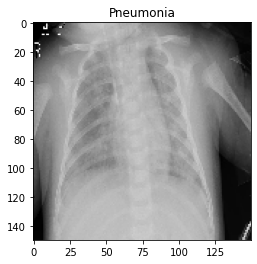

In [86]:
disp_prediction(prediction_pneumonia, sample_pneumonia)

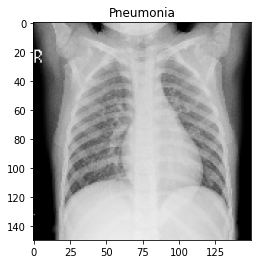

In [87]:
disp_prediction(prediction_normal, sample_normal) ##wrong_prediction